# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
df=pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Descriptive Analysis

check for missing values

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the dataset

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
#UNIVARIATE ANALYSIS

On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

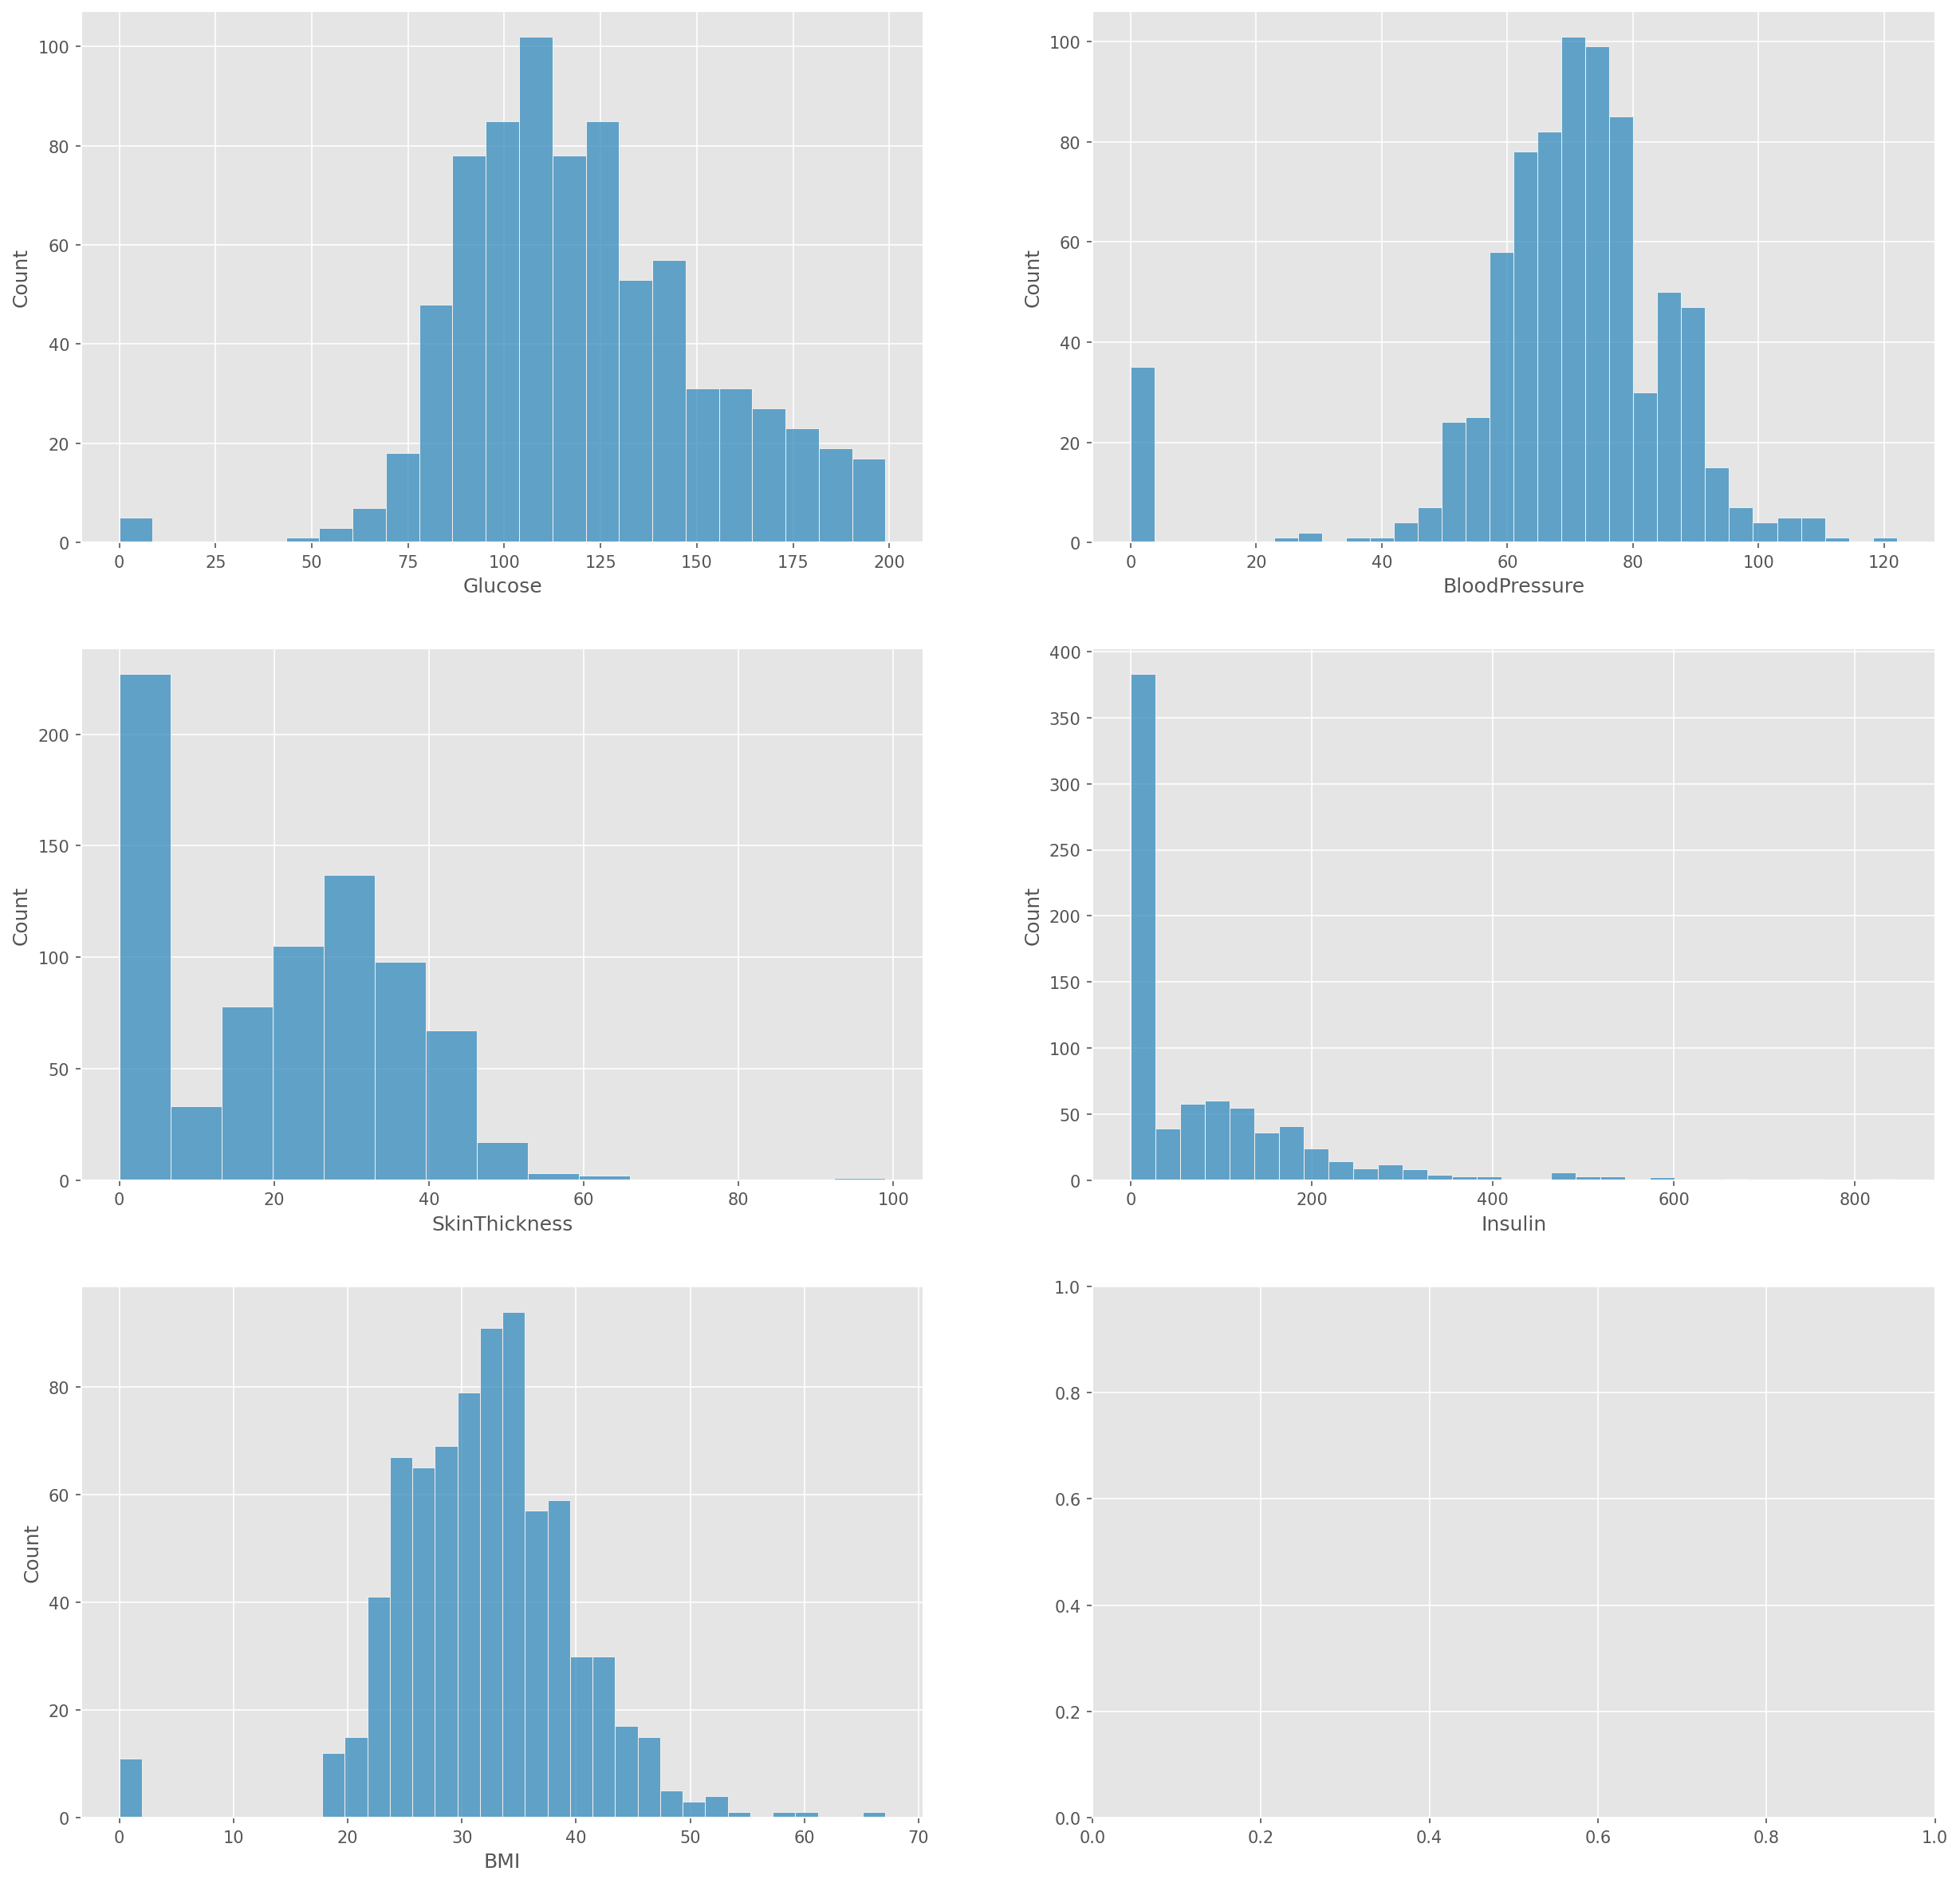

In [9]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(20,20),dpi=150)
sns.histplot(data=df,x='Glucose',ax=axes[0,0])
sns.histplot(data=df,x='BloodPressure',ax=axes[0,1])
sns.histplot(data=df,x='SkinThickness',ax=axes[1,0])
sns.histplot(data=df,x='Insulin',ax=axes[1,1])
sns.histplot(data=df,x='BMI',ax=axes[2,0])
plt.tight_layout;

In [10]:
#Treating Missing Values

In [11]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [12]:
df[df['Glucose']!=0]['Glucose'].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

In [13]:
df[df['BloodPressure']==0].shape

(35, 9)

In [14]:
#we can compute missing values with the mean of glucose.

In [15]:
df[df['BloodPressure']!=0]['BloodPressure'].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [16]:
#df['Glucose']=df['Glucose'].replace([0],[df['Glucose'].mean()])


In [17]:
Columns=[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]
for col in Columns:
    df[col]=df[col].replace([0],[df[col].mean()])

    

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.173824,71.912684,38.668390,110.481791,32.860700,0.471876,33.240885,0.348958
std,3.369578,31.250469,14.423461,24.896786,99.915996,8.642318,0.331329,11.760232,0.476951
min,0.000000,20.536458,20.536458,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,49.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,31.992578,79.799479,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,41.000000,127.250000,36.800000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,120.894531,846.000000,120.894531,2.420000,81.000000,1.000000


In [19]:
df.to_excel('healthcare_final.xlsx')

In [20]:
#create a countplot

**Check the balance of the outcome**

<AxesSubplot:xlabel='Outcome', ylabel='count'>

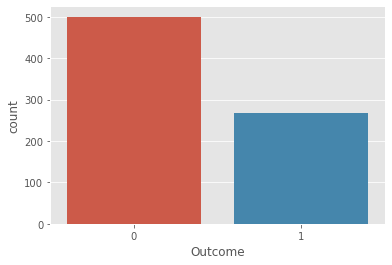

In [21]:
sns.countplot(data=df,x='Outcome',)

In [22]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

268 of 500 are diabetic;which means our data is imbalanced.

**Plot Scatter Plot**

<Figure size 900x600 with 0 Axes>

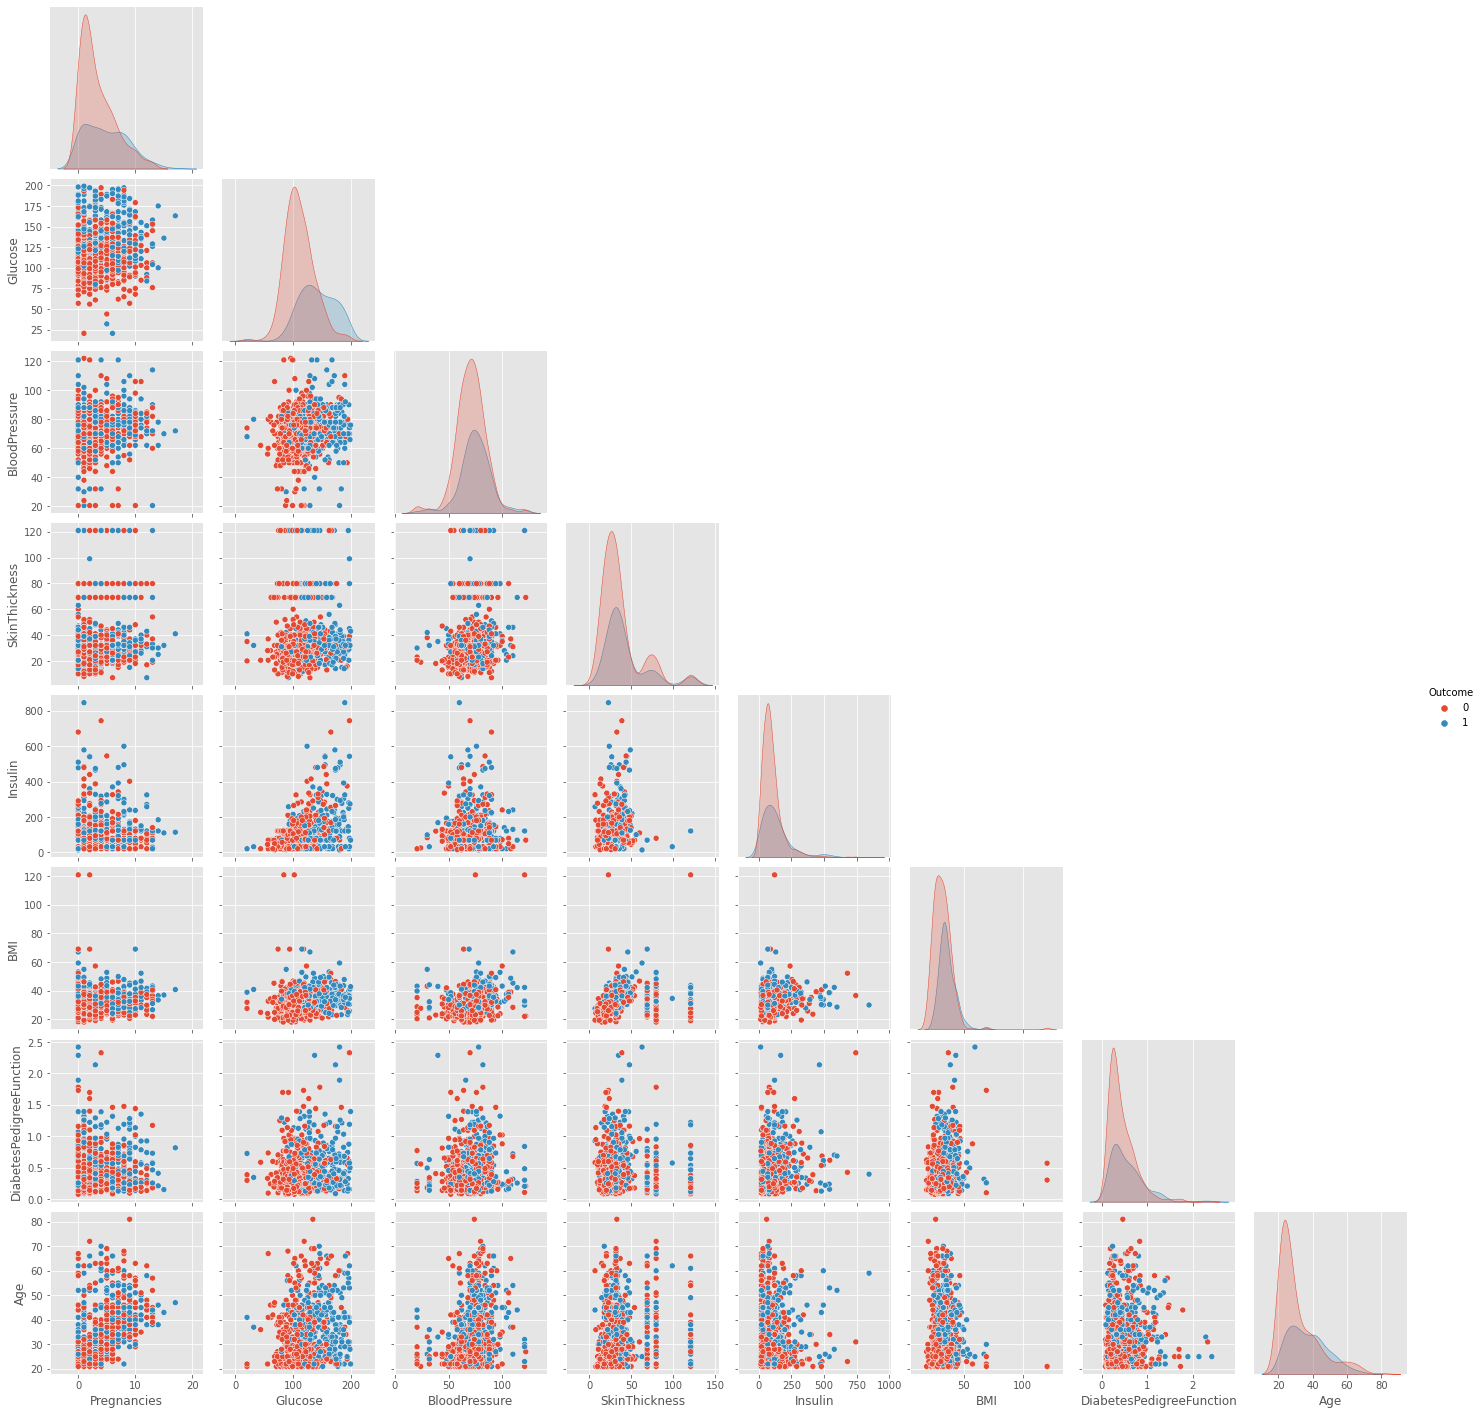

In [23]:
plt.figure(dpi=150)
sns.pairplot(data=df,hue='Outcome',corner=True);


OBSERVATIONS:
1. Glucose levels seems to have a direct relationship with diabetes;Higher levels seem to be postive for diabetes.
2. Higher BMI indicates more cases of diabetes.


**Corelation analysis**

In [24]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127750,0.162306,0.131952,-0.028640,-0.012229,-0.033523,0.544341,0.221898
Glucose,0.127750,1.000000,0.179213,0.082975,0.373471,0.136249,0.134950,0.264064,0.475411
BloodPressure,0.162306,0.179213,1.000000,0.239682,0.047378,0.243211,0.020284,0.281018,0.153084
SkinThickness,0.131952,0.082975,0.239682,1.000000,-0.011692,0.166501,-0.064113,0.134322,0.134381
Insulin,-0.028640,0.373471,0.047378,-0.011692,1.000000,0.145612,0.167476,-0.002527,0.166982
BMI,-0.012229,0.136249,0.243211,0.166501,0.145612,1.000000,0.128671,-0.023017,0.225406
DiabetesPedigreeFunction,-0.033523,0.134950,0.020284,-0.064113,0.167476,0.128671,1.000000,0.033561,0.173844
Age,0.544341,0.264064,0.281018,0.134322,-0.002527,-0.023017,0.033561,1.000000,0.238356
Outcome,0.221898,0.475411,0.153084,0.134381,0.166982,0.225406,0.173844,0.238356,1.000000


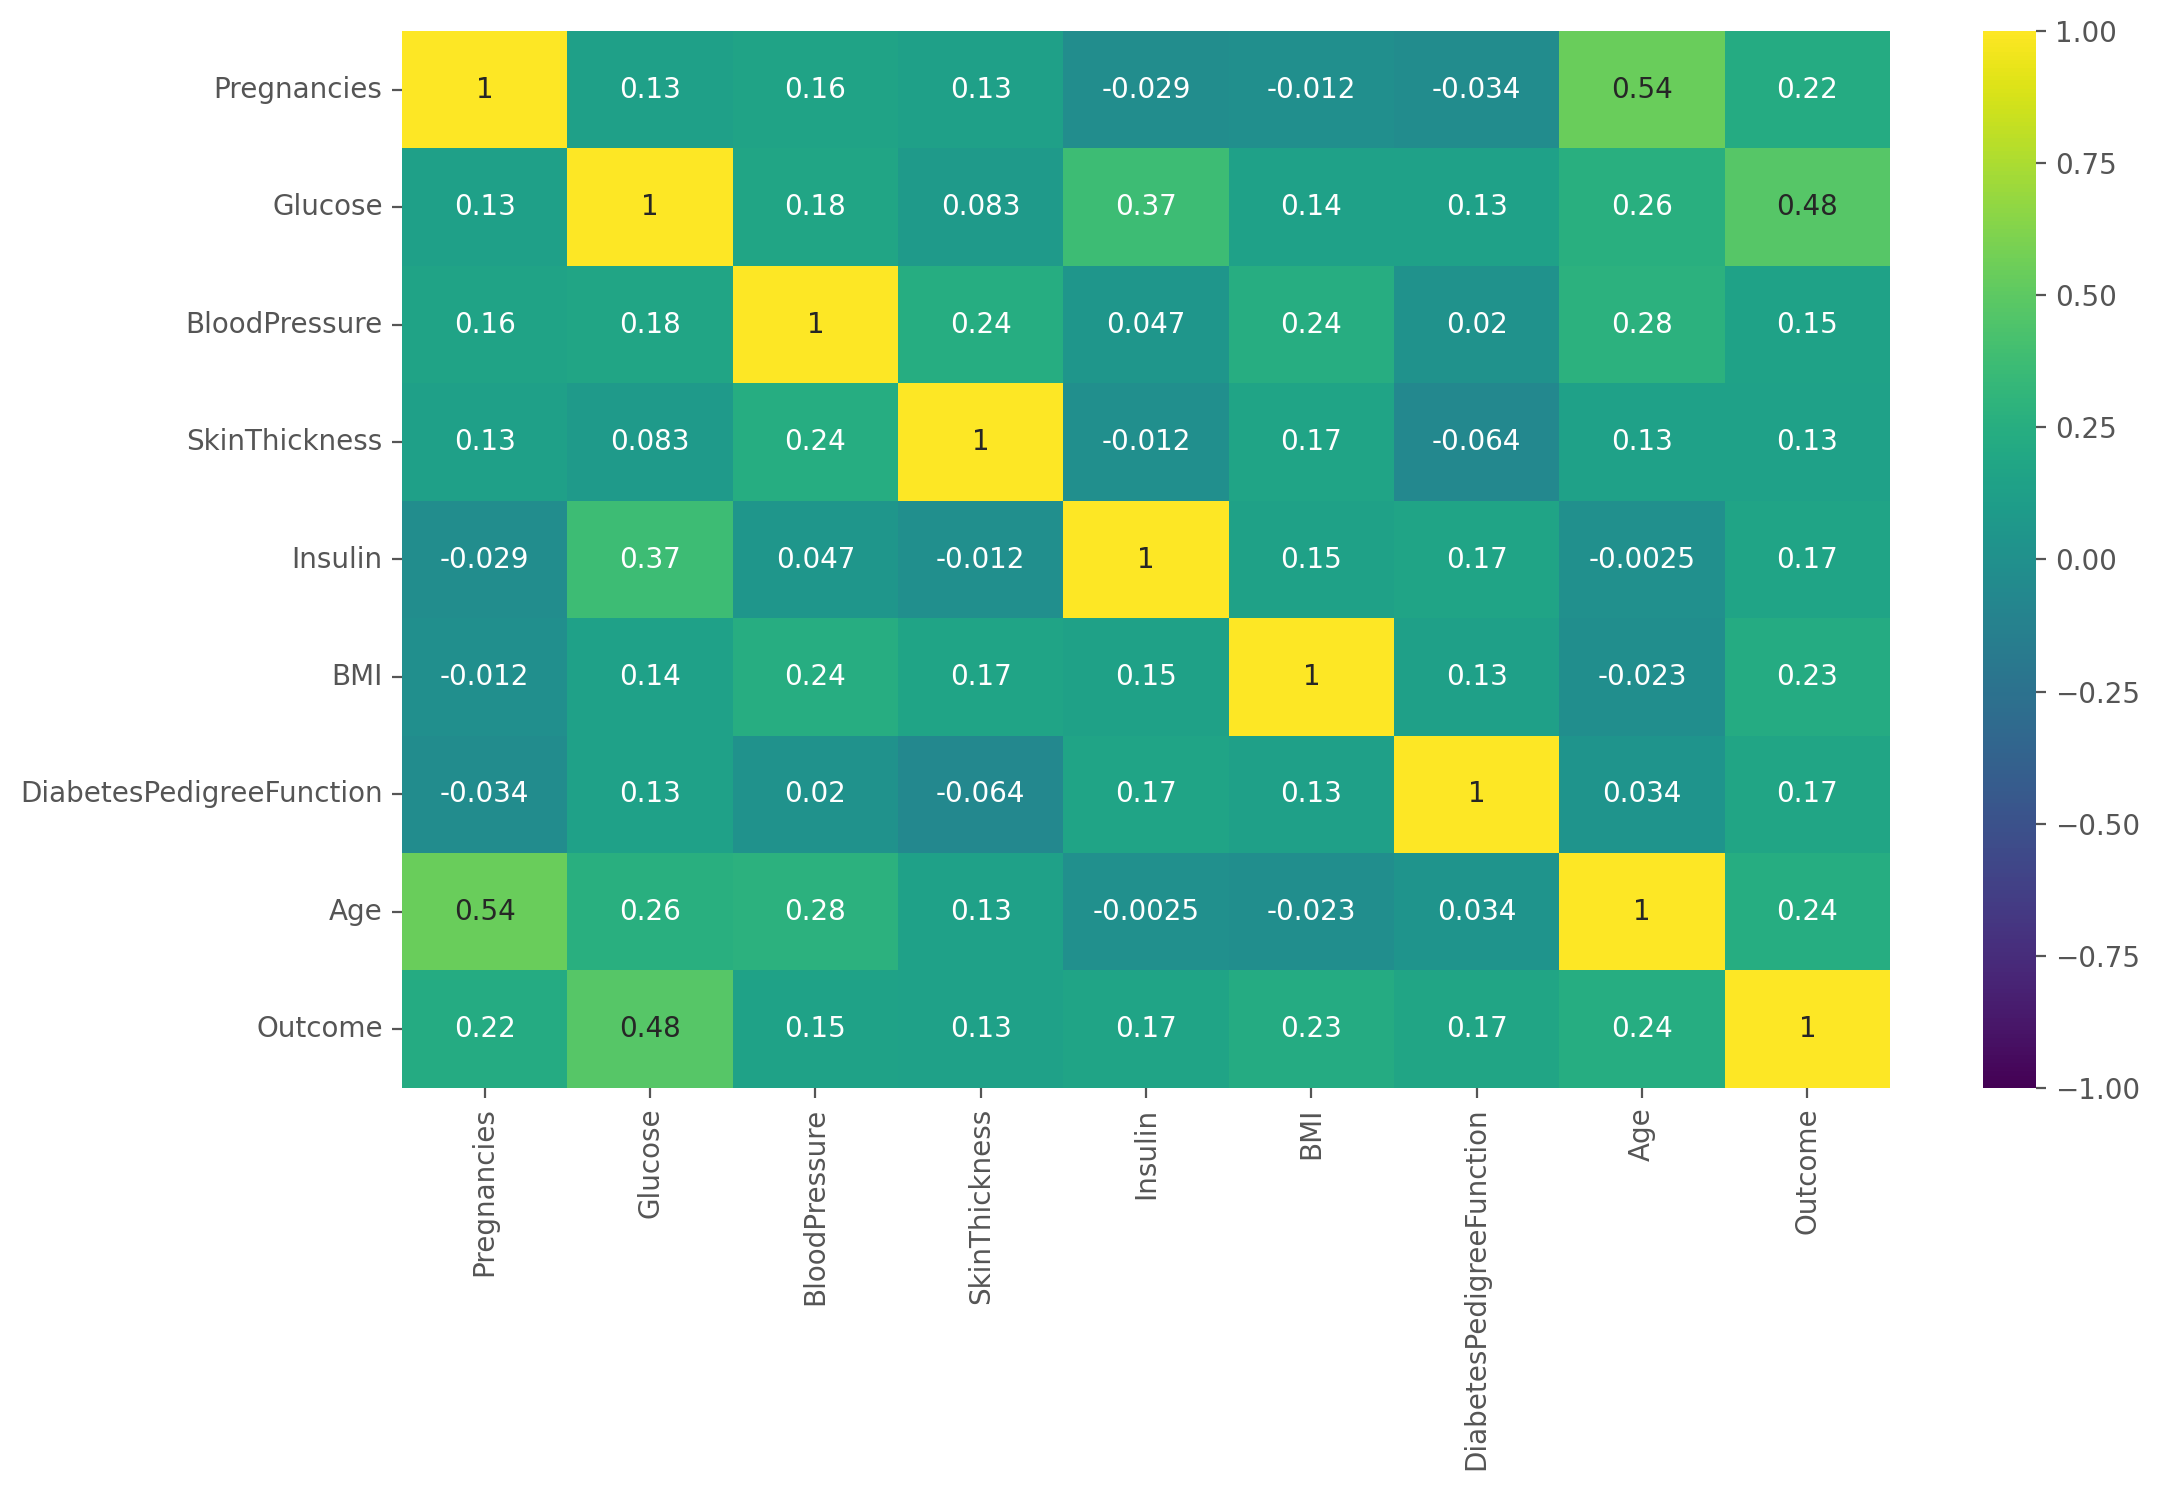

In [25]:
plt.figure(figsize=(12,7),dpi=200)
sns.heatmap(data=df.corr(),annot=True,cmap='viridis',vmax=1,vmin=-1,);

OBSERVATIONS:
1. Age and Pregnancies have a positive corelation of .54;which is practically acceptable.
2. Glucose and Outcome have a positive corelation of .48; and it is likely to happen.Higher levels of glucose 
   indicate more chances of having diabetes.Similar is the case with insulin level and BMI.

# DATA MODELLING

# Train | Test Split and Scaling

In [26]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
scaler=StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**MODEL1:LOGISTIC REGRESSION**

In [30]:
from sklearn.linear_model import LogisticRegressionCV 

In [31]:
log_model = LogisticRegressionCV()

In [32]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [33]:
log_pred=log_model.predict(scaled_X_test)

In [34]:
#Check for overfitting
print("accuracy on train data :",log_model.score(scaled_X_train,y_train))
print("accuracy on test data :",log_model.score(scaled_X_test,y_test))

accuracy on train data : 0.7899022801302932
accuracy on test data : 0.7272727272727273


In [35]:
from sklearn.metrics import plot_confusion_matrix

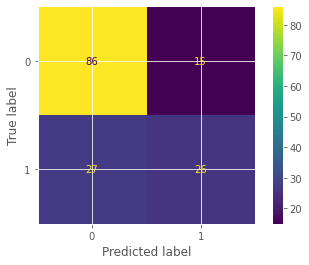

In [36]:
plot_confusion_matrix(log_model,scaled_X_test,y_test);

**MODEL2:RANDOMFOREST CLASSIFIER**

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc=RandomForestClassifier(n_estimators=10,max_features='auto',random_state=100)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=100)

In [40]:
preds=rfc.predict(X_test)

In [41]:
#Check for overfitting
print("accuracy on train data :",rfc.score(X_train,y_train))
print("accuracy on test data :",rfc.score(X_test,y_test))

accuracy on train data : 0.9853420195439739
accuracy on test data : 0.7077922077922078


In [42]:
from sklearn.metrics import plot_confusion_matrix

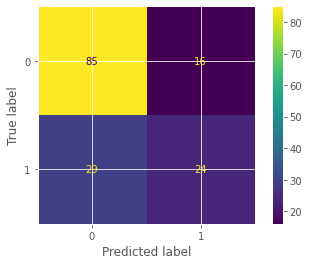

In [43]:
plot_confusion_matrix(rfc,X_test,y_test);

**MODEL3:RANDOMFOREST CLASSIFIER WITH GRID SEARCH**

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
n_estimators=[64,100,128,200]
max_features=[2,3,4]
bootstrap=[True,False]
oob_score=[True,False]

In [46]:
param_grid={'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}

In [47]:
rfc1=RandomForestClassifier()

In [48]:
grid=GridSearchCV(rfc1,param_grid)

In [49]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [50]:
grid.best_params_

{'bootstrap': False,
 'max_features': 2,
 'n_estimators': 100,
 'oob_score': False}

In [51]:
rfc1=RandomForestClassifier(bootstrap= False, max_features= 2, n_estimators= 100, oob_score= False)

In [52]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features=2)

In [53]:
preds1=rfc1.predict(X_test)

In [54]:
#Check for overfitting
print("accuracy on train data :",rfc1.score(X_train,y_train))
print("accuracy on test data :",rfc1.score(X_test,y_test))

accuracy on train data : 1.0
accuracy on test data : 0.7012987012987013


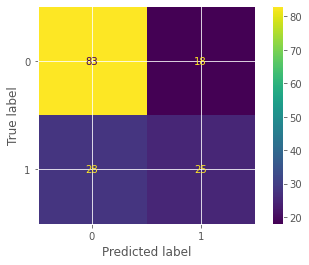

In [55]:
plot_confusion_matrix(rfc1,X_test,y_test);

**Model3:KNN CLASSIFIER**

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=8,
                             metric='minkowski',
                             p = 2)
knnClassifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [57]:
preds2 = knnClassifier.predict(X_test)

In [58]:
#Check for overfitting
print("accuracy on train data :",knnClassifier.score(X_train,y_train))
print("accuracy on test data :",knnClassifier.score(X_test,y_test))

accuracy on train data : 0.7719869706840391
accuracy on test data : 0.7272727272727273


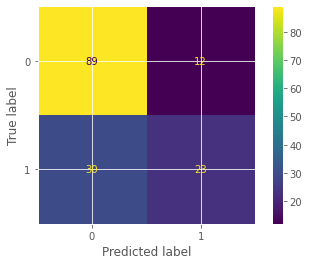

In [59]:
plot_confusion_matrix(knnClassifier,X_test,y_test);

# Evaluating Performance Of The Models

In [60]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,ConfusionMatrixDisplay


In [61]:
print("LOGISTIC MODEL:\n ",classification_report(y_test,log_pred))
print("RANDOMFOREST CLASSIFIER MODEL:\n ",classification_report(y_test,preds))
print("RANDOMFOREST CLASSIFIER WITH GRIDSEARCH:\n ",classification_report(y_test,preds1))
print("KNEIGBORS:\n ",classification_report(y_test,preds2))

LOGISTIC MODEL:
                precision    recall  f1-score   support

           0       0.76      0.85      0.80       101
           1       0.63      0.49      0.55        53

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154

RANDOMFOREST CLASSIFIER MODEL:
                precision    recall  f1-score   support

           0       0.75      0.84      0.79       101
           1       0.60      0.45      0.52        53

    accuracy                           0.71       154
   macro avg       0.67      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154

RANDOMFOREST CLASSIFIER WITH GRIDSEARCH:
                precision    recall  f1-score   support

           0       0.75      0.82      0.78       101
           1       0.58      0.47      0.52        53

    accuracy                           0.70       154
   macro avg       0.66      0.65 

KNN classifier gives acccuracy of 73% on test data without overfitting on train data.

In [62]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

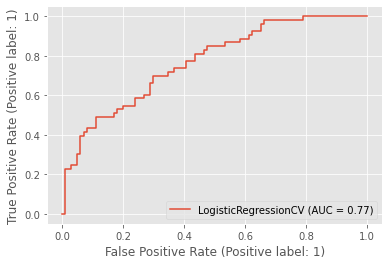

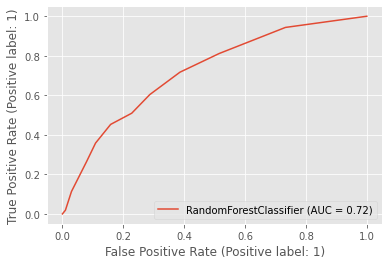

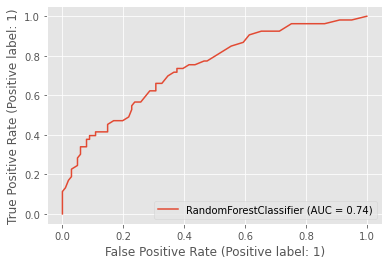

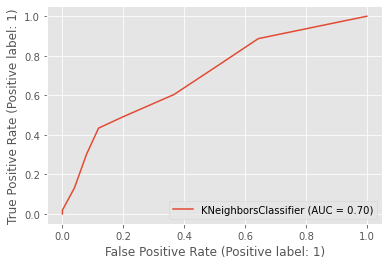

In [63]:
roc1=plot_roc_curve(log_model,scaled_X_test,y_test)
roc2=plot_roc_curve(rfc,X_test,y_test)
roc3=plot_roc_curve(rfc1,X_test,y_test)
roc4=plot_roc_curve(knnClassifier,X_test,y_test)

 Sensitivity is the probability that the model predicts a positive outcome for an observation when the outcome is indeed positive
and specificity is the probability that the model predicts a negative outcome for an observation when the outcome is indeed negative.
An easy way to visualize these two metrics is by creating a ROC curve, which is a plot that displays the sensitivity and specificity of a model.

The true positive rate represents the proportion of observations that are predicted to be positive when indeed they are positive.

Conversely, the false positive rate represents the proportion of observations that are predicted to be positive when they’re actually negative.

When we create a ROC curve, we plot pairs of the true positive rate vs. the false positive rate for every possible decision threshold

The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.The closer AUC is to 1, the better the model


**AUC OF logistic Regression model is highest among the models.**